En esta sección se aboradrá el punto 5 de la actividad A3.2, que consiste en las mejoras que se le aplicarán al primer prototipo del modelo para tener mejor desempeño.

In [9]:
import cv2 as cv
import numpy as np
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) =mnist.load_data()

In [4]:
# Importar Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 1. Definir el modelo con Dropout
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Capa oculta 1
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))  # Apaga aleatoriamente 30% de las neuronas

# Capa oculta 2
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))  # Apaga aleatoriamente 20% de las neuronas

# Capa de salida
model.add(Dense(10, activation="softmax"))

#Optimizador
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

#Compilar el modelo
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Hasta ahora, todos los bloques de código son iguales al primer modelo. Sin embargo, en este bloque, la mejora implementada es *Dropout Regularization*. Esta capa apaga perceptrones de manera aleatoria. La intensión de esto es tener una comportamiento más estable en el accuracy en cada época, y reducir posibles sobreajustes.

In [6]:
 # Funcion de paro
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True)

In [7]:
# Entrenar el modelo
history=model.fit(train_images,train_labels,epochs=100,validation_split=0.3,batch_size=40,callbacks=[early_stop])


Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4357 - loss: 11.1849 - val_accuracy: 0.7442 - val_loss: 0.9473
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6570 - loss: 1.2074 - val_accuracy: 0.8309 - val_loss: 0.6704
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7511 - loss: 0.8996 - val_accuracy: 0.8818 - val_loss: 0.4986
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8214 - loss: 0.6879 - val_accuracy: 0.9086 - val_loss: 0.4094
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8559 - loss: 0.5557 - val_accuracy: 0.9256 - val_loss: 0.3186
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8752 - loss: 0.4750 - val_accuracy: 0.9258 - val_loss: 0.3025
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8866 - loss: 0.4314 - val_accuracy: 0.9285 - val_loss: 0.2988
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8909 - loss: 

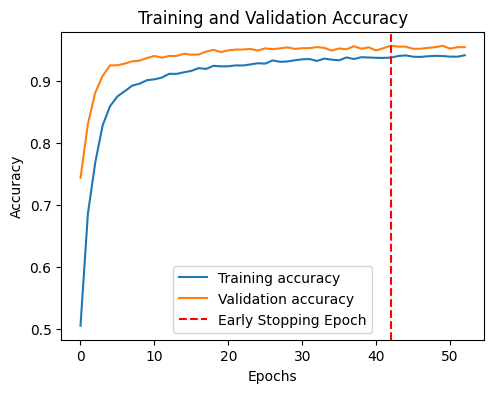

In [11]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
stopped_epoch=early_stop.stopped_epoch
best_epoch=stopped_epoch-early_stop.patience
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.axvline(x=best_epoch,color="r",linestyle="--",label="Early Stopping Epoch")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.2313
Test accuracy: 0.958899974822998


A comparacion de la gráfica del primer modelo, vemos que ambas curvas convergen de mejor manera, y existe menor distancia entre ellas. Además de ello, vemos que la gráfica de validación no se degrada tanto a comparación de la del primer modelo. Por lo que si bien, el accucary en el grupo de prueba se redujo un poco, el modelo es más consistente, y reduce el riesgo de sobreajuste.

Como segunda mejora, se utilizará el llamado *Data Augmentation*. Este método genera versiones distorcionadas (con rotaciones, translaciones, zoom, etc) para que el modelo pueda tener una mejor generalizacion de los dígitos, y que sea más robusto cuando se le presente imágenes que no son del Dataframe de MNIST y que no estén en condiciónes perfectas, es decir, que esten centradas, a escala, etc.

Como tercera mejora, se utilizó la normalización de las imágenes, que consiste en transformar los valores de los pixeles de un rango de 0-255 a un rango de 0-1 dividiendo entre 255. Esto se hizo porque los modelos de redes neuronales son sensibles a la escala de los datos de entrada, y si los valores son grandes (como 255), los gradientes durante el entrenamiento pueden volverse inestables o hacer que el optimizador (Adam, en este caso) tarde más en converger. La normalización asegura que todas las entradas estén dentro de un rango homogéneo, lo que facilita el aprendizaje y acelera la convergencia.

In [13]:
# ============================================
# A3.2 Redes Neuronales - Clasificación de dígitos MNIST
# Modelo mejorado con Normalización + Data Augmentation + Dropout
# ============================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# --- 2. Cargar dataset MNIST ---
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
# Normalización (escala de 0 a 1)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [32]:
# Añadir un canal (pasar de (28,28) → (28,28,1))
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [33]:
# --- 4. Dividir conjunto de entrenamiento en train y validación ---
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.3, random_state=42
)

# --- 5. Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=8,        # rotación ±8°
    width_shift_range=0.1,    # desplazamiento horizontal
    height_shift_range=0.1,   # desplazamiento vertical
    zoom_range=0.1            # zoom leve
)

datagen.fit(x_train)

In [34]:
# --- 5. Definir modelo con Dropout ---
model2 = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation="relu"),
    Dropout(0.3),             # Dropout capa 1
    Dense(64, activation="relu"),
    Dropout(0.2),             # Dropout capa 2
    Dense(10, activation="softmax")
])

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# --- 6. Entrenamiento ---
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [42]:
history = model2.fit(
    datagen.flow(x_train, y_train, batch_size=40),
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.8802 - loss: 0.3907 - val_accuracy: 0.9563 - val_loss: 0.1506
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.8885 - loss: 0.3553 - val_accuracy: 0.9637 - val_loss: 0.1251
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9026 - loss: 0.3260 - val_accuracy: 0.9667 - val_loss: 0.1121
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9069 - loss: 0.3039 - val_accuracy: 0.9696 - val_loss: 0.1011
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9090 - loss: 0.2937 - val_accuracy: 0.9689 - val_loss: 0.1024
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9149 - loss: 0.2799 - val_accuracy: 0.9654 - val_loss: 0.1112
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9152 - loss: 0.2763 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 

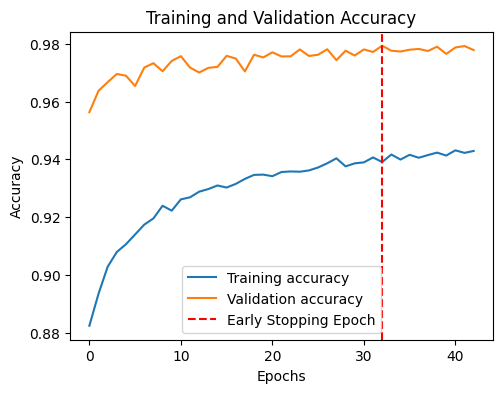

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9796 - loss: 0.0664
Exactitud final en conjunto de prueba: 98.35%


In [43]:
# --- 7. Visualización de resultados ---
stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.axvline(x=best_epoch, color="r", linestyle="--", label="Early Stopping Epoch")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- 8. Evaluación final ---
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print(f"Exactitud final en conjunto de prueba: {test_accuracy*100:.2f}%")



Como se observa, las mejoras impactaron positivamente al modelo. El entrenamiento fue más estable, las curvas de pérdida y precisión dejaron de fluctuar bruscamente, pues si bien en esta gráfica las lineas se ven más separadas y con más variación, observando la escala vemos que esto es en realidad un "zoom en la gráfica, pues los valores van de 0.88 a 0.98, mientras que la gráfica anterior iba de 0.5 hasta 0.9, por lo mismo podemos decir que el modelo se mantuvo bastante estable. Otras de ls mejoras que tuvo el modelo, fue que el modelo alcanzó una mayor exactitud de validación en menos épocas, ademas de haber aumentado a 98.35% su *accuracy* en el grupo de prueba, indecando también mejoras.

In [44]:
# Guardar el modelo

model2.save("model_2.keras")
print("Modelo guardado correctamente.")

Modelo guardado correctamente.
